In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
import mcbe

from PIL import Image
from scipy.spatial import ConvexHull
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from random import randint
import random


# results from other paper numerically validated

In [3]:
m_max = 150
n_max = 30
b0_inj = np.zeros((m_max,m_max))

bnorm_inj = np.zeros((m_max,m_max))

bnorm_injr2 = np.zeros((m_max,m_max))


In [3]:
#long runtime!!
m_range = range(2,m_max)

for m in tqdm(m_range):
    for n in range(2,np.min([m,n_max])):
    
        #W = mcbe.random_sphere(m,n)[0]
        W = mcbe.random_point(m,n)
        #alpha = mcbe.mcbe(W,1000)
        alpha = mcbe.mcbe(W,500000,distribution="normal")
        alpha_r2 = mcbe.mcbe(W,500000,distribution="ball",radius=10,sample_on_sphere=False)
        
        b0_inj[n,m] = np.mean(np.array(alpha) >= 0)
        bnorm = mcbe.get_point(distribution="normal",d=m)
        bnorm_inj[n,m] = np.mean(np.array(alpha) >= bnorm)
        bnorm_injr2[n,m] = np.mean(np.array(alpha_r2) >= bnorm)
        

 78%|███████▊  | 115/148 [116:39:37<33:28:35, 3651.98s/it]


KeyboardInterrupt: 

In [536]:
#plt.rcParams.update({'font.size': 12,'text.usetex': True,'text.latex.preamble': r'\usepackage{amsfonts}'})
#plt.rcParams["font.family"] = "Times New Roman"

In [14]:
plt.rcParams.update({'font.family':'Times New Roman', 'font.size': 28})

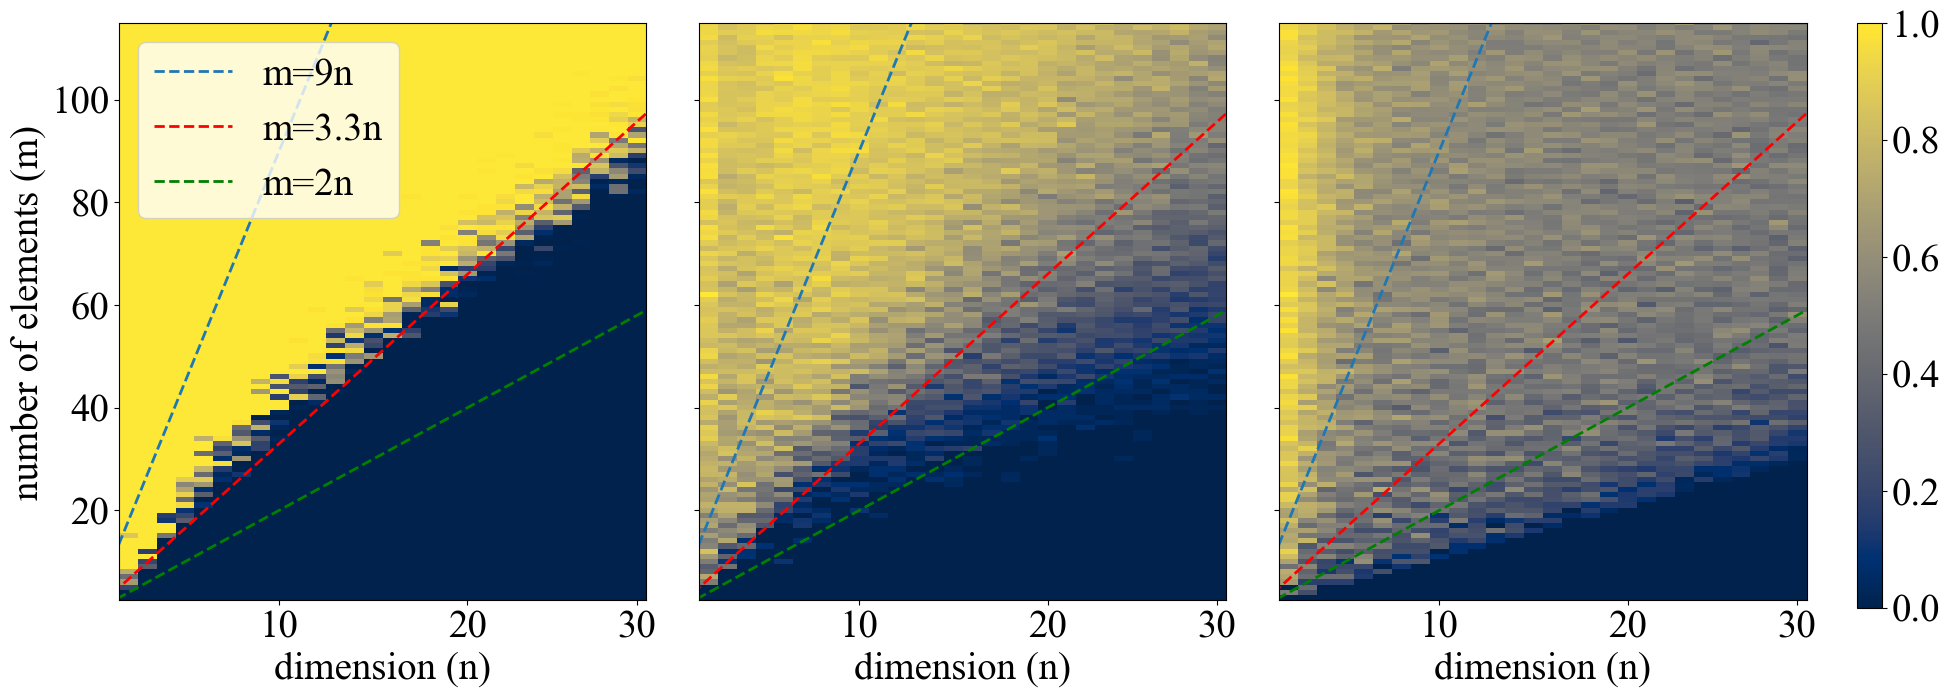

In [ ]:
#three plots on same figure
fig, axs = plt.subplots(1, 3, figsize=(25,7.5), sharey=True)
#make fontsoze bigger

axs[0].imshow(b0_inj.T,cmap="cividis")
axs[0].set_xlabel("dimension (n)")
axs[0].set_ylim((2.5,115))
axs[0].plot(range(m_max),[x*9 for x in range(int(m_max))],linewidth=2,linestyle="--")
axs[0].plot(range(m_max),[x*3.3 for x in range(int(m_max))],linewidth=2,linestyle="--",color="red")
axs[0].plot(range(m_max),[x*2 for x in range(int(m_max))],linewidth=2,linestyle="--",color="green")
axs[0].set_xlim((1.5,n_max-0.5))
axs[0].set_aspect('auto')
axs[0].set_ylabel("number of elements (m)")
axs[0].legend(["m=9n","m=3.3n","m=2n","m=n"])

axs[1].imshow(bnorm_injr2.T,cmap="cividis")
axs[1].set_xlabel("dimension (n)")
axs[1].set_ylim((2.5,115))
axs[1].plot(range(m_max),[x*9 for x in range(int(m_max))],linewidth=2,linestyle="--")
axs[1].plot(range(m_max),[x*3.3 for x in range(int(m_max))],linewidth=2,linestyle="--",color="red")
axs[1].plot(range(m_max),[x*2 for x in range(int(m_max))],linewidth=2,linestyle="--",color="green")
axs[1].set_xlim((1.5,n_max-0.5))
axs[1].set_aspect('auto')

axs[2].imshow(bnorm_inj.T,cmap="cividis")
axs[2].set_xlabel("dimension (n)")
axs[2].set_ylim((2.5,115))
axs[2].plot(range(m_max),[x*9 for x in range(int(m_max))],linewidth=2,linestyle="--")
axs[2].plot(range(m_max),[x*3.3 for x in range(int(m_max))],linewidth=2,linestyle="--",color="red")
axs[2].plot(range(m_max),[x*2 for x in range(int(m_max))],linewidth=2,linestyle="--",color="green")
axs[2].set_xlim((1.5,n_max-0.5))
axs[2].set_aspect('auto')

#add ticks
axs[0].set_xticks([10,20,29],["10","20","30"])
axs[1].set_xticks([10,20,29],["10","20","30"])
axs[2].set_xticks([10,20,29],["10","20","30"])


# Set common labels
#fig.text(0.04, 0.5, 'number of elements (m)', va='center', rotation='vertical')


#make colorbar for all plots
plt.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.1, 0.01, 0.78])
fig.colorbar(mappable=axs[2].images[0],orientation="vertical",cax=cbar_ax)

#reduce space between subplots
plt.subplots_adjust(wspace=0.1)


In [5]:
m_max = 150
n_max = 30
b0_inj = np.zeros((m_max,m_max))

bnorm_inj_var01 = np.zeros((m_max,m_max))

bnorm_inj_var1 = np.zeros((m_max,m_max))


In [6]:
#recalculate b0_inj
#long runtime!!
m_range = range(2,m_max)

for m in tqdm(m_range):
    #for n in range(2,np.min([m,n_max])):
    for n in range(int(np.floor(m/9)),int(np.min([np.floor(m/2),n_max]))):
    
        #W = mcbe.random_sphere(m,n)[0]
        W = mcbe.random_point(m,n)
        #alpha = mcbe.mcbe(W,1000)
        alpha = mcbe.mcbe(W,500000,distribution="normal")
        #alpha_r2 = mcbe.mcbe(W,500000,distribution="ball",radius=10,sample_on_sphere=False)
        
        b0_inj[n,m] = np.mean(np.array(alpha) >= 0)
        bnorm = mcbe.get_point(distribution="normal",d=m)
        bnorm_inj_var01[n,m] = np.mean(np.array(alpha) >= bnorm*np.sqrt(10))
        bnorm_inj_var1[n,m] = np.mean(np.array(alpha) >= bnorm)

  0%|          | 0/148 [00:00<?, ?it/s]c:\Users\heckert\Documents\GitHub\Alpha-rectifying-frames\mcbe\mcbe.py:229: RuntimeWarning: invalid value encountered in divide
  alpha_list.append(alpha/np.linalg.norm(polytope,axis=1))
c:\Users\heckert\Documents\GitHub\Alpha-rectifying-frames\mcbe\mcbe.py:282: RuntimeWarning: invalid value encountered in divide
  return alpha/np.linalg.norm(polytope,axis=1)
 11%|█         | 16/148 [46:28<6:23:23, 174.27s/it] 


KeyboardInterrupt: 

In [ ]:
#export matrix
np.savetxt("b0_inj.csv", b0_inj, delimiter=",")
np.savetxt("bnorm_inj_var01.csv", bnorm_inj_var01, delimiter=",")
np.savetxt("bnorm_inj_var1.csv", bnorm_inj_var1, delimiter=",")

In [ ]:
#three plots on same figure
fig, axs = plt.subplots(1, 3, figsize=(25,7.5), sharey=True)
#make fontsoze bigger

axs[0].imshow(b0_inj.T,cmap="cividis")
axs[0].set_xlabel("dimension (n)")
axs[0].set_ylim((2.5,115))
axs[0].plot(range(m_max),[x*9 for x in range(int(m_max))],linewidth=2,linestyle="--")
axs[0].plot(range(m_max),[x*3.3 for x in range(int(m_max))],linewidth=2,linestyle="--",color="red")
axs[0].plot(range(m_max),[x*2 for x in range(int(m_max))],linewidth=2,linestyle="--",color="green")
axs[0].set_xlim((1.5,n_max-0.5))
axs[0].set_aspect('auto')
axs[0].set_ylabel("number of elements (m)")
axs[0].legend(["m=9n","m=3.3n","m=2n","m=n"])

axs[1].imshow(bnorm_inj_var01.T,cmap="cividis")
axs[1].set_xlabel("dimension (n)")
axs[1].set_ylim((2.5,115))
axs[1].plot(range(m_max),[x*9 for x in range(int(m_max))],linewidth=2,linestyle="--")
axs[1].plot(range(m_max),[x*3.3 for x in range(int(m_max))],linewidth=2,linestyle="--",color="red")
axs[1].plot(range(m_max),[x*2 for x in range(int(m_max))],linewidth=2,linestyle="--",color="green")
axs[1].set_xlim((1.5,n_max-0.5))
axs[1].set_aspect('auto')

axs[2].imshow(bnorm_inj_var1.T,cmap="cividis")
axs[2].set_xlabel("dimension (n)")
axs[2].set_ylim((2.5,115))
axs[2].plot(range(m_max),[x*9 for x in range(int(m_max))],linewidth=2,linestyle="--")
axs[2].plot(range(m_max),[x*3.3 for x in range(int(m_max))],linewidth=2,linestyle="--",color="red")
axs[2].plot(range(m_max),[x*2 for x in range(int(m_max))],linewidth=2,linestyle="--",color="green")
axs[2].set_xlim((1.5,n_max-0.5))
axs[2].set_aspect('auto')

#add ticks
axs[0].set_xticks([10,20,29],["10","20","30"])
axs[1].set_xticks([10,20,29],["10","20","30"])
axs[2].set_xticks([10,20,29],["10","20","30"])


# Set common labels
#fig.text(0.04, 0.5, 'number of elements (m)', va='center', rotation='vertical')


#make colorbar for all plots
plt.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.1, 0.01, 0.78])
fig.colorbar(mappable=axs[2].images[0],orientation="vertical",cax=cbar_ax)

#reduce space between subplots
plt.subplots_adjust(wspace=0.1)

(-0.5, 335.5, 309.5, -0.5)

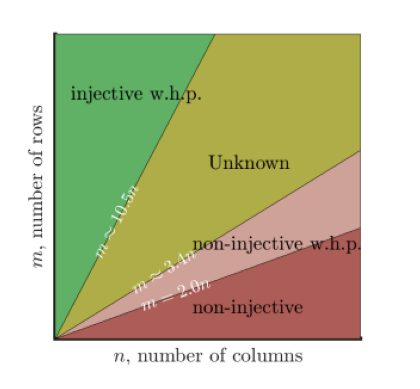

In [68]:
# img from the paper
img = Image.open("theoretical_inj.png")
img = np.array(img)
plt.imshow(img)
plt.axis('off')